Github link: https://github.com/tryllekunstneren/Assignment2_Group11

Christian Warburg: s225083 40% part 1, Contributions: 60% part 2, 50% part 3

Sofus Carstens: s224959, Contributions: 60% part 1, 40% part 2, 50% part 3

# Formalia

Please read the [assignment overview page](https://github.com/TheYuanLiao/comsocsci2025/wiki/Assignments) carefully before proceeding. The page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment.

We teach about Pandas Dataframe and there is a video on how to use pandas and mistakes not to make when using it (see [Week 2](https://nbviewer.org/github/TheYuanLiao/comsocsci2025/blob/main/lectures/Week2.ipynb)/Prelude to part 3: Pandas Dataframes). We expect you to apply that knowledge in all exercises. A score of 3 means "excellent", where we expect you to deliver efficient dataframe operations, i.e., operations are implemented in a vectorized, efficient manner using pandas recommended practices.

__If you fail to follow these simple instructions, it will negatively impact your grade!__

**Due date and time**: The assignment is due on April 1st at 23:59. Hand in your Jupyter notebook file (with extension `.ipynb`) via DTU Learn _(Assignment 2)_. 

Remember to include in the first cell of your notebook:
* the link to your group's Git repository 
* group members' contributions


## Part 1: Properties of the real-world network of Computational Social Scientists

These exercises are taken from Week 5. Please note that 2 Degree distribution is taken out and 3 Shortest paths is numbered 2 here.
> __Exercise: Analyzing Networks through a Random Model__ 
>
>
>
> 1. _Random Network_: Let's start by building a Random Network, acting as a baseline (or ["null model"](https://en.wikipedia.org/wiki/Null_model)) to understand the Computational Social Scientists Network better.  
>
> * First, calculate the probability (_p_) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding _p_, figure out the average degree (using the given formula). 

In [29]:
import json
import networkx as nx
from networkx.readwrite import json_graph

#this code is used for the exercise below. This code just calculates the total number of nodes and edges in our
#computational social scientist network.


file = "computational_social_scientists_network.json"

with open(file, "r") as f:
    data = json.load(f)

G = json_graph.node_link_graph(data)


N = G.number_of_nodes()
L = G.number_of_edges()

print(f"Total number of nodes (authors): {N}")
print(f"Total number of links (collaborations): {L}")

Total number of nodes (authors): 14760
Total number of links (collaborations): 59432


### ANSWER

We use equation 3.2 from the textbook:

$$
\langle L \rangle = p \cdot \frac{N(N - 1)}{2}
$$

To match the expected number of edges, $\langle L \rangle$, we set $L_{actual} = \langle L \rangle = p \cdot \frac{N(N - 1)}{2}$ 
(Here $L_{actual}$ is the actual number of edges in our compsosci network, N is the number of nodes in the network)

Now we solve for $p$ and get:

$$
p = \frac{2 L_{actual}}{N(N - 1)}
$$

We insert our numbers and get:

$$
p = \frac{2 \cdot 59432}{14760(14760 - 1)} = 0.00054564106
$$

We now use equation (3.3) to obtain the average degre of a random network:

$$
\langle K \rangle = p \cdot (N-1)
$$

We insert our numbers and get:

$$
\langle K \rangle = 0.00054564106 \cdot (14760-1) = 8.053
$$


> * Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated _p_. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution. 

### Answer

We use the definition from "Box 3.1" and the step below the box in the network science book to create our random network that mirros our compsosci netowrk in terms of node count and calculated p value from above:

In [30]:
import numpy as np
import networkx as nx

def generate_random_network(N, p): #just like in the book

    G = nx.Graph()
    G.add_nodes_from(range(N))

    for i in range(N):
        for j in range(i+1, N):
            if np.random.uniform(0, 1) < p:
                G.add_edge(i, j)

    return G


  > * Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below). 


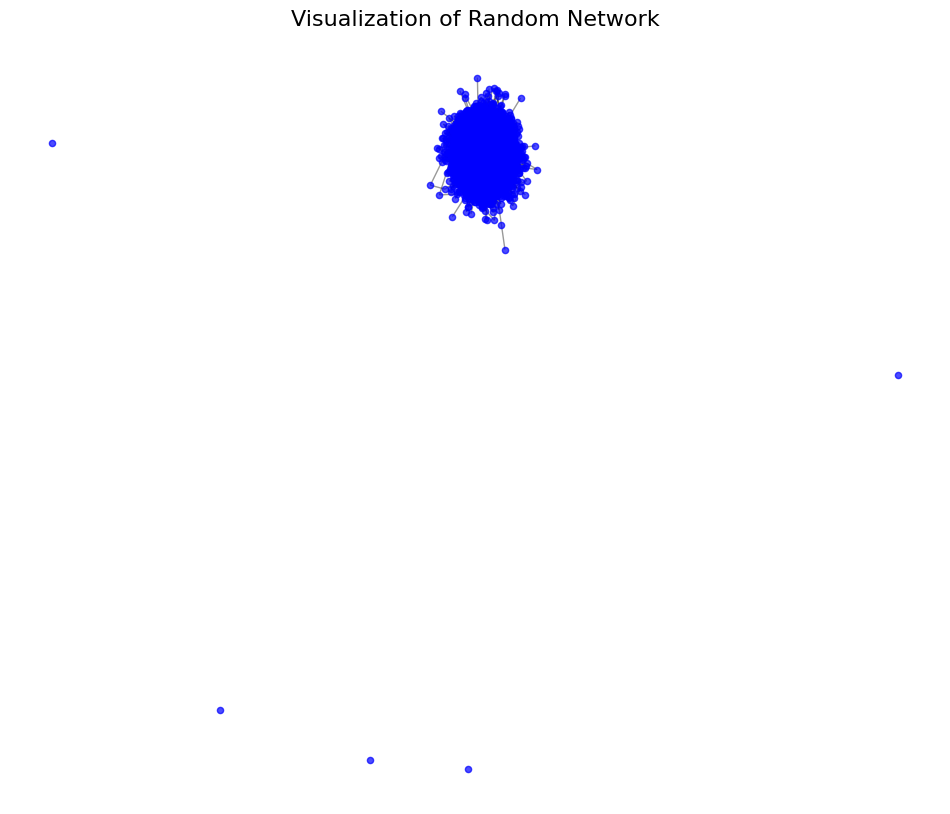

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

N = 14760  
p = 0.00054564106 
random_network = generate_random_network(N, p)


plt.figure(figsize=(12, 10))

pos = nx.spring_layout(random_network, seed=42)

nx.draw_networkx_nodes(random_network, pos, node_size=20, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(random_network, pos, alpha=0.4)

plt.axis('off')

plt.title("Visualization of Random Network", fontsize=16)

plt.show()


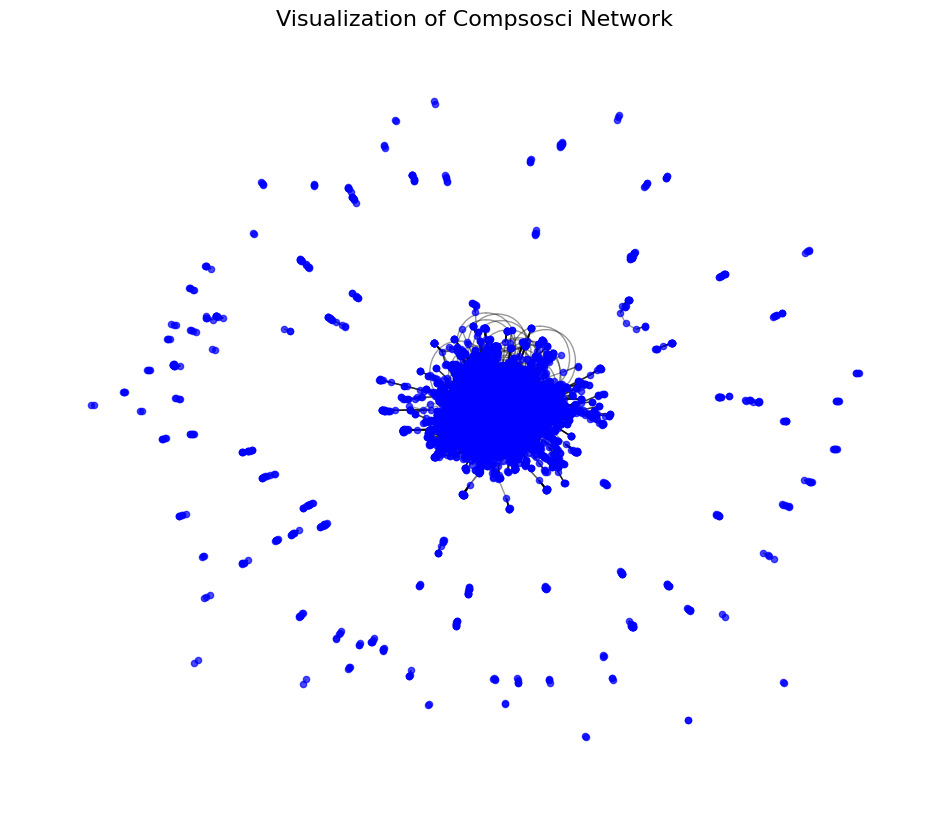

In [ ]:

plt.figure(figsize=(12, 10))

pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=20, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.axis('off')

# Set title
plt.title("Visualization of Compsosci Network", fontsize=16)

plt.show()

>
> * Answer the following questions __(max 200 words in total)__: 
>    - What regime does your random network fall into? Is it above or below the critical threshold?  
>    - According to the textbook, what does the network's structure resemble in this regime?  
>    - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.
>
>   

### Answer

In the textbook they say the critical point in random netwroks is when the average degree reacehs 1, or equivalenty $p ≈ \frac{1}{N}$.

We can calculate the critical threshold using equation (3.11) $p_c ≈ \frac{1}{N}$:

$$
p_c = \frac{1}{N} = \frac{1}{14760} = 0.00006775067
$$

We see that our $p$ value of $0.00054564106$ is above the critical point $p_c$, written as: $p > p_c$, which means our network is above the critical threshold.

In conclusion: With a linking probabilty of $p = 0.00054564106$ and $N = 14760$ nodes, our random network falls above the critical threshold. The critical point for random networks occurs when $p_c = \frac{1}{N} = 0.00006775067$, which marks the emergence of a giant component. Since our value of $p$ is significantly higher, the average degree $⟨k⟩=p(N−1)$ exceeds 1, confirming that the network lies in the supercritical regime.

According to the Network Science textbook, in this regime a giant component emerges that connects a large fraction of the nodes. The network's structure resembles a connected core of nodes (the giant component), surrounded by small clusters and isolated nodes. This allows for large-scale connectivity, where most nodes can reach each other through a relatively small number of steps.

We see in the compsosci network there are way more isolated nodes and small clusters than in the random network. random networks distribute connections more uniformly, and when the average degree is sufficiently high, they tend to form one large, connected component with fewer isolated nodes. This difference arises because real networks reflect underlying social or functional groupings, whereas random networks lack such inherent structure. But both networks have "one big component" which is normal and logical for large networks.

> 2. _Shortest Paths_: Here, we will check if the Computational Social Scientists Network exhibits characteristics of a small-world network by analyzing its shortest paths.
> * Begin by identifying the largest connected component within the Computational Social Scientists network. Recall that a connected component is a subset of nodes in which every pair of nodes is connected by a path. For a refresher on connected components, see section 2.9 of the Network Science book. Follow these steps:
>    - Utilize [``nx.algorithms.connected_components``](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.components.connected_components.html) to enumerate all connected components, which will be returned as a list of node subsets.
>    - Select the largest subset of nodes identified in the previous step. Then, create a subgraph of your original network that includes only these nodes, using [``nx.Graph.subgraph``](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html). This subset forms your largest connected component, sometimes referred to as the [giant component](https://en.wikipedia.org/wiki/Giant_component).

### Answer

In the code below we find the largest connected component by utilzing the "nx.connected_components" function from networkx to make a list of all connected componenets as subsets. Then we find the largest connected component by simply just taking the subset with the highest length. And then define this subset as a new network using "G.subgraph". Then we print the subgraph with the original graph stats to see how they comapare. We see the largest connected component is almost as big as the original network

In [33]:
connected_components = list(nx.connected_components(G)) #"G" is our computational social scientists network.

largest_cc = max(connected_components, key=len)

G_lcc = G.subgraph(largest_cc).copy()

print(f"Original network: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"Largest connected component: {G_lcc.number_of_nodes()} nodes, {G_lcc.number_of_edges()} edges")


Original network: 14760 nodes, 59432 edges
Largest connected component: 14163 nodes, 58124 edges


> * Calculate the average (unweighted) shortest path length within this giant component by employing [``nx.average_shortest_path_length``](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html).


### Answer

In [34]:
asp = nx.average_shortest_path_length(G_lcc)
print(f"Average shortest path length (unweighted) in the largest connected component of the compsosci network: {asp}")

Average shortest path length (unweighted) in the largest connected component of the compsosci network: 5.212963642393712


> * Perform the same calculation for the giant component of the random network you constructed in the above exercise 1.

### Answer

In [ ]:
connected_components_random = list(nx.connected_components(random_network)) #"G" is our computational social scientists network.

largest_cc_random = max(connected_components_random, key=len)

G_lcc_random = random_network.subgraph(largest_cc_random).copy()

print(f"Original network: {random_network.number_of_nodes()} nodes, {random_network.number_of_edges()} edges")
print(f"Largest connected component: {G_lcc_random.number_of_nodes()} nodes, {G_lcc_random.number_of_edges()} edges")

asp_random = nx.average_shortest_path_length(G_lcc_random)
print(f"Average shortest path length (unweighted) in the largest connected component of the random network: {asp_random}")

Original network: 14760 nodes, 59509 edges
Largest connected component: 14755 nodes, 59509 edges
Average shortest path length (unweighted) in the largest connected component of the random network: 4.832721758263283


> * Reflect on how the average shortest path lengths of the real and random networks compare and answer the following questions, supporting your answers with the theory from the book.
>   - Why do you think I asked you to consider the giant component only?

### Answer

The giant component is the largest connected subgraph where a path exists between any two nodes. Since our $<K>$ > 1 we expect to have a giant component (section 3.3). We were asked to calculate the average shortest path length which is only meaningful when calculated within a connected subset. This is because small clusters or single nodes (disconnected components) would make this average shortest path length infinite/undefined for many node pairs (chapter 3.7). It is also worth mentioning that in both the compsosci networth and random network, their giant component covers more than 95% of the of nodes. This means that the giant component is representitive.

>   - Why do you think I asked you to consider unweighted edges?

### Answer

Because later we wanted to consider the "small-world phenomenon". In the small world phenomenon, only the existence of edges between nodes is important, not their weights (chapter 3.8). Also random networks are typically unweighted, so when we compare the two networks (compsosci and random) we have consistency.

>   - Does the Computational Social Scientists network exhibit the small-world phenomenon?

### Answer

The small-world phenomenon states that in many real networks, the average distance between nodes is surprisingly small, even in massive networks like social systems.



Key Equation (3.19): The average distance ⟨d⟩ in a random network follows:

$$
\langle d \rangle \approx \frac{\ln N}{\ln \langle k \rangle}
$$

Where:
- $ N $ = number of nodes
- $ \langle k \rangle $ = average degree


We see that the distances grow **logarithmically** (not linearly) with network size. This means even huge networks have short paths. For an example in a social network with $ N \approx 10^6 $ and $ \langle k \rangle \approx 100 $, $ \langle d \rangle \approx 3 $ - far smaller than $ N $

For our compsoci
- $ N = 14,163 $
- $ \langle k \rangle \approx 8.2 $
- Predicted: $ \langle d \rangle_{predicted} \approx \frac{\ln(14163)}{\ln(8.2)} \approx 4.95 $
- Observed: $ \langle d \rangle_{real} = 5.21 $ (very close to prediction)

This close agreement between predicted and observed path lengths confirms small-world behavior in our compsosci network

## Part 2 Network Analysis in Computational Social Science

These exercises are taken from Week 6: __Exercise 1: Mixing Patterns and Assortativity__ and __Exercise 3: Zachary's karate club__.

> __Exercise 1: Mixing Patterns and Assortativity__ 
>
> __Part 1: Assortativity Coefficient__ 
> 1. *Calculate the Assortativity Coefficient* for the network based on the country of each node. Implement the calculation using the formula provided during the lecture, also available in [this paper](https://arxiv.org/pdf/cond-mat/0209450.pdf) (equation 2, here for directed networks). **Do not use the NetworkX implementation.**

> ##### Answer to 1:
> The Assortativity Coefficient was found to be: 0.21268. The code to compute it can be found underneath


> __Part 2: Configuration model__
> In the following, we are going to assess the significance of the assortativity by comparing the network's assortativity coefficient against that of random networks generated through the configuration model.  
>
> 2. *Implement the configuration model* using the _double edge swap_ algorithm to generate random networks. Ensure each node retains its original degree but with altered connections. Create a function that does that by following these steps:
>   - **a.** Create an exact copy of your original network.
>   - **b.** Select two edges, $e_{1} = (u,v)$ and $e_{2} = (x,y)$, ensuring *u != y* and *v != x*.
>   - **c.** Flip the direction of $e_{1}$ to $e_{1} = (v,u)$ 50% of the time. This ensure that your final results is not biased, in case your edges were sorted (they usually are). 
>   - **d.** Ensure that new edges $e_{1}' = (e_{1}[0],e_{2}[1])$ and $e_{2}' = (e_{2}[0],e_{1}[1])$ do not already exist in the network.
>   - **e.** Remove edges $e_{1}$ and $e_{2}$ and add edges $e_{1}'$ and $e_{2}'$.
>   - **f.** Repeat steps **b** to **e** until you have performed _E*10_ swaps, where E is the total number of edges.
> 3. *Double check that your algorithm works well*, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.

> The code for this question can be found underneath


> __Part 3: Analyzing Assortativity in Random Networks__  
>
> 4. *Generate and analyze at least 100 random networks* using the configuration model. For each, calculate the assortativity with respect to the country and plot the distribution of these values. Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.
>

> ##### Answer to 3:
> We can see on the plot (can be seen underneath) that the original network have a significant higher assortativity with respect to country than the random networks, meaning that authors are significantly more likely to collaborate with others from the same country than would be expected by chance, indicating strong country-based homophily in the network.

In [36]:
import json
import networkx as nx
from networkx.readwrite import json_graph

# Load your JSON file
with open("updated_graph.json", "r") as f:
    data = json.load(f)

# Parse the JSON data into a NetworkX graph
G = json_graph.node_link_graph(data)


In [ ]:
def compute_attribute_assortativity(G, attribute):
    # Build a mapping from node to attribute value (defaulting to "Unknown" if missing)
    node_to_attr = {}
    for node, data in G.nodes(data=True):
        value = data.get(attribute, "Unknown")
        node_to_attr[node] = value

    # Determine the set of all attribute values present.
    attr_values = set(node_to_attr.values())

    # Initialize the mixing matrix: mixing[a][b] will hold the total weight of edges between attribute a and b.
    mixing = {a: {b: 0 for b in attr_values} for a in attr_values}

    # Iterate over each edge in G, accumulating edge weights.
    for u, v, data in G.edges(data=True):
        # Use the "weight" attribute if present, otherwise default to 1.
        weight = data.get('weight', 1)
        a_u = node_to_attr.get(u, "Unknown")
        a_v = node_to_attr.get(v, "Unknown")
        
        if a_u == a_v:
            # For same attribute, add the weight once.
            mixing[a_u][a_u] += weight
        else:
            # For cross-attribute edges, add the weight to both (a_u, a_v) and (a_v, a_u)
            mixing[a_u][a_v] += weight
            mixing[a_v][a_u] += weight

    # Compute the total weight; note that cross edges have been counted twice.
    total_weight = sum(mixing[a][b] for a in attr_values for b in attr_values)

    # Convert counts to fractions to form the matrix e_ij.
    e = {a: {b: mixing[a][b] / total_weight for b in attr_values} for a in attr_values}

    # Compute a_i = sum_j e_ij for each attribute a.
    a_i = {a: sum(e[a][b] for b in attr_values) for a in attr_values}

    # Compute the sums for the assortativity formula.
    sum_e_ii = sum(e[a][a] for a in attr_values)
    sum_a_sq = sum(a_i[a]**2 for a in attr_values)

    # Compute assortativity r using the formula:
    # r = (sum_e_ii - sum_a_sq) / (1 - sum_a_sq)
    if 1 - sum_a_sq == 0:
        return None  # Avoid division by zero.

    r = (sum_e_ii - sum_a_sq) / (1 - sum_a_sq)
    return np.round(r, 5)

with open("updated_graph.json", "r") as f:
    data = json.load(f)

# Convert the JSON (node-link format) into a NetworkX graph.
G = json_graph.node_link_graph(data)

r_country = compute_attribute_assortativity(G, "country")
print("Assortativity coefficient (country):", r_country)

Assortativity coefficient (country): 0.21268


In [ ]:
import networkx as nx
import random
import json

#This function jsut checks if the degree presevation is kept
def check_degree_preservation(G_original, G_swapped):

    degrees_original = dict(G_original.degree())
    degrees_swapped = dict(G_swapped.degree())
    for node in G_original.nodes():
        if degrees_original[node] != degrees_swapped[node]:
            return False
    return True

def optimized_double_edge_swap_configuration_model(G, nswap_multiplier=10):

    # Create an exact copy of the original graph.
    G_rand = G.copy()
    
    # Precompute the edge list once.
    edge_list = list(G_rand.edges())
    E = len(edge_list)
    nswaps = E * nswap_multiplier  # Total swaps to perform

    swaps = 0
    attempts = 0
    max_attempts = nswaps * 10  # Limit to avoid infinite loops

    while swaps < nswaps and attempts < max_attempts:
        attempts += 1
        
        # Randomly select two distinct indices from the edge list.
        i1, i2 = random.sample(range(len(edge_list)), 2)
        e1 = edge_list[i1]
        e2 = edge_list[i2]
        u, v = e1
        x, y = e2

        # Ensure u != y and v != x.
        if u == y or v == x:
            continue

        # With 50% probability, flip the direction of e1.
        if random.random() < 0.5:
            u, v = v, u

        # Check for self-loops.
        if u == y or x == v:
            continue
        
        # Ensure the new edges do not already exist.
        if G_rand.has_edge(u, y) or G_rand.has_edge(x, v):
            continue

        # Perform the swap: remove e1 and e2, add new edges (u, y) and (x, v).
        try:
            G_rand.remove_edge(*e1)
            G_rand.remove_edge(*e2)
        except nx.NetworkXError:
            # If one of the edges is missing, skip this swap.
            continue

        G_rand.add_edge(u, y)
        G_rand.add_edge(x, v)
                
        # Update the edge list with the new edges.
        edge_list[i1] = (u, y)
        edge_list[i2] = (x, v)
        swaps += 1

    #print(f"Performed {swaps} successful swaps out of {attempts} attempts.")
    return G_rand



from networkx.readwrite import json_graph

with open("updated_graph.json", "r") as f:
    data = json.load(f)

    # Parse the JSON data into a NetworkX graph.
    G = json_graph.node_link_graph(data)
G_rand = optimized_double_edge_swap_configuration_model(G)



if check_degree_preservation(G, G_rand):
    print("Degree preservation confirmed: all nodes have the same degree as the original graph.")
else:
    print("Degree preservation failed: some nodes have different degrees.")

Degree preservation confirmed: all nodes have the same degree as the original graph.


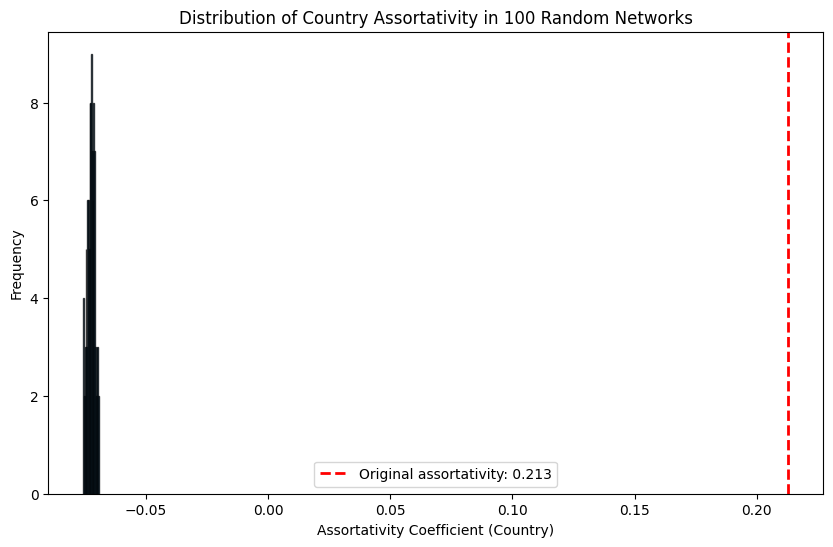

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import json
from networkx.readwrite import json_graph
# Load the original JSON graph.
with open("updated_graph.json", "r") as f:
    data = json.load(f)
G = json_graph.node_link_graph(data)

# Compute assortativity of the original graph.
r_original = compute_attribute_assortativity(G, "country")

# Number of random networks to generate.
num_random_networks = 100
random_assortativities = []

# Use the built-in double_edge_swap to generate random networks.
# First, determine swap parameters based on the number of edges.
E = G.number_of_edges()
nswap = E * 10
max_tries = E * 100

for i in range(num_random_networks):
    # Create a copy of the original graph.
    G_copy = G.copy()
    # Randomize the graph via double edge swap.
    G_rand = optimized_double_edge_swap_configuration_model(G_copy, nswap_multiplier=10)
    # Compute the assortativity for the randomized graph.
    r_rand = compute_attribute_assortativity(G_rand, "country")
    random_assortativities.append(r_rand)

# Plot the distribution of assortativity values.
plt.figure(figsize=(10, 6))
plt.hist(random_assortativities, bins=20, alpha=0.75, edgecolor='black')
plt.axvline(x=r_original, color='red', linestyle='dashed', linewidth=2,
            label=f'Original assortativity: {r_original:.3f}')
plt.xlabel("Assortativity Coefficient (Country)")
plt.ylabel("Frequency")
plt.title("Distribution of Country Assortativity in 100 Random Networks")
plt.legend()
plt.show()


> __Exercise 2: Zachary's karate club__: In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). The dataset is available in NetworkX, by calling the function [karate_club_graph](https://networkx.org/documentation/stable//auto_examples/graph/plot_karate_club.html)
>
> 1. Visualize the graph. Set the color of each node based on the club split (the information is stored as a node attribute). My version of the visualization is below.

> 
> ##### Answer to 1:  Code can found below


> 2. Write a function to compute the __modularity__ of a graph partitioning (use **equation 9.12** in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.

> ##### Answer to 2: Code can found below


>
> 3. Explain in your own words the concept of _modularity_.

> ##### Answer to 3:
> Modularity is a measure used in network analysis to asses the quality of a community / partitioning in the network. It compares the density of inside communities to the density of edges between communities. A high modularity means that the communites have many edges within eachother, and few edges between communities. It is used in network analysis to determine community structure.

> 4. Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a [node attribute](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.classes.function.get_node_attributes.html), called _"club"_.

> ##### Answer to 4: 
> We found the modularity to be 0.358
>

> 5. Create $1000$ randomized version of the Karate Club network using the _double edge swap_ algorithm you wrote in the exercise above 5. For each of them, compute the modularity of the "club" split and store it in a list.
> 6. Compute the average and standard deviation of the modularity for the random network.
> 7. Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)).
> 8. Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?

> ##### Answer to 8:
> From the figure, we can make the following observations and conclusions:
>
>1. **The Karate Club’s Partition is Significantly Better Than Random:**  
  The red dashed line (actual modularity, around 0.358) lies far to the right of the distribution   of modularities for the randomized networks, which mostly cluster around values near 0 or negative. This indicates that the real club split (the president vs. administrator factions) yields a much higher modularity than would be expected by chance. Consequently, it suggests that the club split is indeed a “good” partition in terms of internal cohesion vs. external connectivity.

>2. **Why the Randomization Experiment?**  
   By generating many randomized versions of the graph (while keeping other properties the same) and comparing their modularities to the original network’s modularity, we get a baseline or “null model.” If the actual network’s modularity is significantly higher than what arises in the random ensemble, we can conclude that the observed community structure is *not* just a random artifact.

>3. **Why Preserve Node Degrees?**  
   In network science, node degrees can heavily influence community metrics like modularity. By preserving each node’s degree in the random networks, we ensure that *only* the way edges are rewired is random, not the number of edges each node has. This controls for the possibility that any high modularity in the real network might simply be due to the degree distribution. Since we keep degrees fixed, any difference in modularity arises from the *arrangement* of edges rather than from differences in how many edges each node has.

 
> 9.  Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?

> ##### Answer to 9:
>The Louvain algorithm produced a higher modularity value than the club split. This indicates that Louvain identified a community structure with denser internal connections, better reflecting the network's true modularity compared to the predefined club division.


> 10.  Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix **_D_** with dimension (2 times _A_), where _A_ is the number of communities found by Louvain. We set entry _D_(_i_,_j_) to be the number of nodes that community _i_ has in common with group split _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

> ##### Answer to 10:
> From the matrix, we can see that:

- **Communities 0 and 1** contain only members of the “Mr. Hi” club (11 and 5 nodes, respectively).  
- **Community 2** contains only members of the “Officer” club (6 nodes).  
- **Community 3** is mostly “Officer” (11 nodes) but includes 1 “Mr. Hi” node.

>This shows that the Louvain partition broadly aligns with the original two-club division (most communities map cleanly to a single club). However, it also reveals **finer structure**: instead of just splitting into two groups, the Louvain algorithm detects four communities, with one “Mr. Hi” node more closely tied to the “Officer” side. 

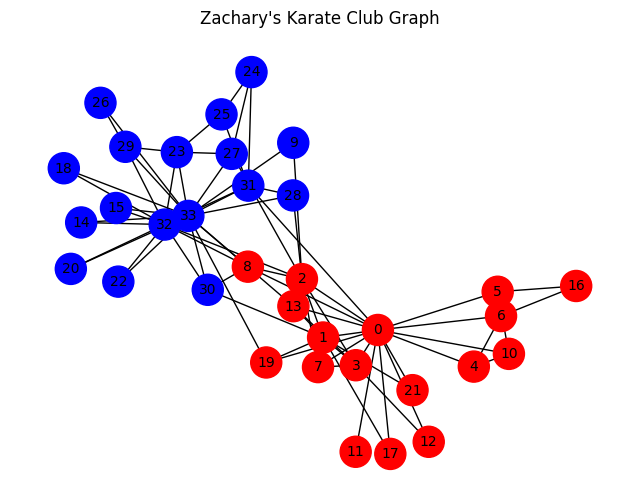

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

#we call the karate club graph from networkx
G = nx.karate_club_graph()


colors = []
for node, data in G.nodes(data=True):
    if data["club"] == "Mr. Hi":
        colors.append("red")
    else:
        colors.append("blue")

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, node_color=colors, with_labels=True, node_size=500, font_size=10)
plt.title("Zachary's Karate Club Graph")
plt.axis("off")
plt.show()

In [41]:
from collections import defaultdict

G = nx.karate_club_graph()
def modularity(G,partition):
    L = G.number_of_edges()

    L_c = defaultdict(int)
    k_c = defaultdict(int)

    for node in G.nodes():
        comm = partition[node]
        k_c[comm] += G.degree(node)

    for u, v in G.edges():
        if partition[u] == partition[v]:
            L_c[partition[u]] += 1
    
    # Compute modularity
    M = 0.0
    for comm in L_c:
        M += (L_c[comm] / L) - (k_c[comm] / (2.0 * L))**2
    
    return M


M = modularity(G, {node: data["club"] for node, data in G.nodes(data=True)})
print(f"Modularity of the Karate Club graph: {M:.3f}")




Modularity of the Karate Club graph: 0.358


Actual modularity of the club split: 0.3582347140039447
Average modularity of random networks: -0.01489349112426042
Standard deviation of modularity: 0.046813631645321


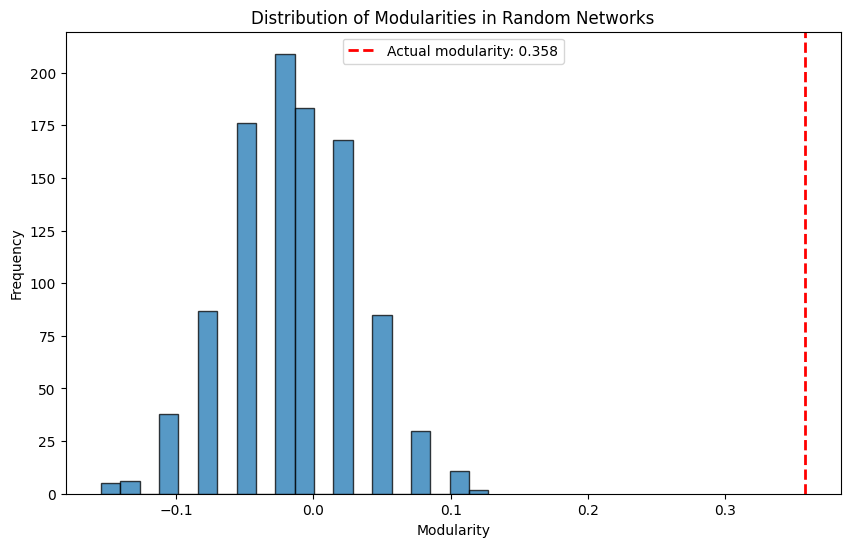

In [43]:
G = nx.karate_club_graph()

# Define the partition using the club split.
club_partition = {node: data["club"] for node, data in G.nodes(data=True)}

# Compute the actual modularity for the original network.
actual_modularity = modularity(G, club_partition)
print("Actual modularity of the club split:", actual_modularity)

# Number of random networks to generate.
num_random_networks = 1000
random_modularities = []

# Generate random networks and compute modularity for each.
for i in range(num_random_networks):
    # Create a copy of the original graph.
    G_copy = G.copy()
    # Randomize the graph via the optimized double edge swap.
    G_rand = optimized_double_edge_swap_configuration_model(G_copy, nswap_multiplier=10)
    # Compute the modularity for the randomized network.
    mod_rand = modularity(G_rand, club_partition)
    random_modularities.append(mod_rand)

# Compute the mean and standard deviation of the random modularity values.
mu_modularity = np.mean(random_modularities)
std_modularity = np.std(random_modularities)

print("Average modularity of random networks:", mu_modularity)
print("Standard deviation of modularity:", std_modularity)

# Plot the distribution of the random modularity values.
plt.figure(figsize=(10, 6))
plt.hist(random_modularities, bins=20, alpha=0.75, edgecolor='black')
plt.axvline(x=actual_modularity, color='red', linestyle='dashed', linewidth=2,
            label=f'Actual modularity: {actual_modularity:.3f}')
plt.xlabel("Modularity")
plt.ylabel("Frequency")
plt.title("Distribution of Modularities in Random Networks")
plt.legend()
plt.show()

Modularity: 0.44385412567230753


C:\Users\sofus\AppData\Local\Temp\ipykernel_16392\4193636538.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


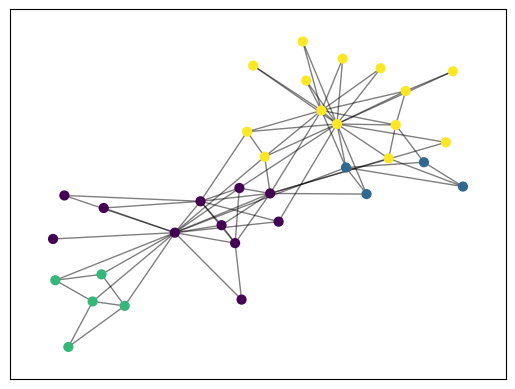

In [45]:
import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()
partition = community_louvain.best_partition(G)
mod = community_louvain.modularity(partition, G)
print("Modularity:", mod)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


Confusion Matrix (Rows: Louvain communities, Columns: Club groups):
             Mr. Hi  Officer
Community 0      11        0
Community 1       5        0
Community 2       0        4
Community 3       1       13


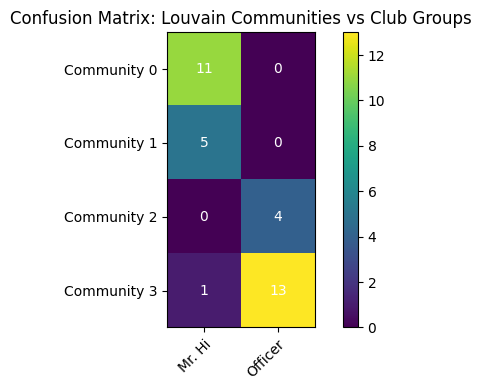

In [47]:
import community.community_louvain as community_louvain
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Karate Club graph and compute the Louvain partition
G = nx.karate_club_graph()
louvain_partition = community_louvain.best_partition(G)

# Determine unique Louvain communities and club groups
communities = sorted(set(louvain_partition.values()))
club_groups = sorted({data['club'] for _, data in G.nodes(data=True)})

# Initialize the confusion matrix D with shape: (number of communities) x (number of club groups)
D = np.zeros((len(communities), len(club_groups)), dtype=int)

# Create mapping indices
community_to_idx = {comm: i for i, comm in enumerate(communities)}
club_to_idx = {club: j for j, club in enumerate(club_groups)}

# Populate the confusion matrix: count nodes per (Louvain community, club group)
for node, comm in louvain_partition.items():
    club_label = G.nodes[node]['club']
    i = community_to_idx[comm]
    j = club_to_idx[club_label]
    D[i, j] += 1

# For inspection, you can also view the matrix as a DataFrame
df = pd.DataFrame(D, index=[f'Community {comm}' for comm in communities],
                  columns=club_groups)
print("Confusion Matrix (Rows: Louvain communities, Columns: Club groups):")
print(df)

# Plot the confusion matrix using matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(D, cmap='viridis')

# Set ticks and labels for the axes
ax.set_xticks(np.arange(len(club_groups)))
ax.set_yticks(np.arange(len(communities)))
ax.set_xticklabels(club_groups)
ax.set_yticklabels([f'Community {comm}' for comm in communities])

# Rotate the x-axis tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotate each cell with its numeric value
for i in range(len(communities)):
    for j in range(len(club_groups)):
        ax.text(j, i, D[i, j], ha="center", va="center", color="w")

ax.set_title("Confusion Matrix: Louvain Communities vs Club Groups")
fig.tight_layout()
plt.colorbar(im)
plt.show()


## Part 3 - Words that characterize Computational Social Science communities

These exercises are taken from Week 8
> __Exercise 1: TF-IDF and the Computational Social Science communities.__ The goal for this exercise is to find the words charachterizing each of the communities of Computational Social Scientists.
> What you need for this exercise: 
>    * The assignment of each author to their network community, and the degree of each author (Week 6, Exercise 4). This can be stored in a dataframe or in two dictionaries, as you prefer.  
>    * the tokenized _abstract_ dataframe (Week 7, Exercise 2)

In [10]:
df_author_community_degree = pd.read_csv("author_community_degree.csv")
df_asbtracts_with_tokens = pd.read_csv("final_abstracts_with_tokens.csv")

### Answer

>
> 1. First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 
>   * What does IDF stand for?

### Answer

TF-IDF is a numerical measure used to assess the importance of a word in a document relative to a collection of documents. The idea is to emphasize words that are frequent in one document (indicating they might be key topics) but rare across the entire set of documents (indicating they are not common words).

- **TF (Term Frequency):** This measures how often a word appears in a specific document. The more times a term appears in a document, the higher its term frequency.
- **IDF (Inverse Document Frequency):** This measures how unique or rare a word is across all documents in the corpus. If a word appears in many documents, its IDF value is lower, reducing its overall weight.

In essence, TF-IDF helps to highlight words that are important for a specific document while downplaying words that are common in the language overall. This balance makes it useful for tasks like search, document clustering, and topic identification.


> 2. Now, we want to find out which words are important for each *community*, so we're going to create several ***large documents, one for each community***. Each document includes all the tokens of abstracts written by members of a given community. 
>   * Consider a community _c_
>   * Find all the abstracts of papers written by a member of community _c_.
>   * Create a long array that stores all the abstract tokens 
>   * Repeat for all the communities. 
> __Note:__ Here, to ensure your code is efficient, you shall exploit ``pandas`` builtin functions, such as [``groupby.apply``](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) or [``explode``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).


> 3. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the __top 5 communities__ (by number of authors). 
>   * Describe similarities and differences between the communities.
>   * Why aren't the TFs not necessarily a good description of the communities?
>   * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?

> 4. We're ready to calculate TF-IDF. Do that for the __top 9 communities__ (by number of authors). Then for each community: 
>   * List the 10 top TF words 
>   * List the 10 top TF-IDF words
>   * List the top 3 authors (by degree)
>   * Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?


 __Exercise 2: The Wordcloud__. It's time to visualize our results!

> * Install the [`WordCloud`](https://pypi.org/project/wordcloud/) module. 
> * Now, create word-cloud for each community. Feel free to make it as fancy or non-fancy as you like.
> * Make sure that, together with the word cloud, you print the names of the top three authors in each community (see my plot above for inspiration). 
> * Comment on your results. What can you conclude on the different sub-communities in Computational Social Science? 
> * Look up online the top author in each community. In light of your search, do your results make sense?

 __Exercise 3: Computational Social Science__ 

> * Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science. 
> * In light of your data-driven analysis, has your understanding of the field changed? How? __(max 150 words)__

### Answer

Our understanding of Computational social has been widened in the sense of different techniques of analysing patterns in complex data, and especially within network analysis. Computational social science can get really deep and there is almost an infinite amount of things you could analyse. The field requires strong skills in handling large datasets and manipulating it for your purpose. This allows for things like network analysis and community detection which we recently have learned, that can open up for new possibilities for understanding human behavior and social dynamics.